# Data Storytelling: Phone sales in Ukraine

The dataset set contains data about the mobile phones which were released in the past 8 years and which can be bought in Ukraine. The dataset contains the model name, brand name and operating system of the phone and its popularity. It also has its financial characteristics like lowest/highest/best price and sellers amount. And some of the characteristics like screen/battery size, memory amount and release date.

We'll look at the following questions:

- Which phone brands are the most popular?
- Do bigger screen sizes increase prices generally?
- What other features of the phone correlate with one another?
- What prices, screen sizes, battery capacity, etc. do best selling phones have?

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('phones_data.csv')
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [24]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# reindex from 1 instead of 0
df.index = df.index + 1

df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
1,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
5,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [25]:
# check if there is any null value
df.isna().sum()

brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

We'll need to either fill in the missing values or drop the rows completely.

For operating systems, as we cannot predict OS correctly, we'll just fill missing values with "Other".

In [26]:
temp = df[df.os.isna()]
temp.os = temp.os.fillna('Other')
df[df.os.isna()] = temp

df.isna().sum()

brand_name          0
model_name          0
os                  0
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [32]:
df[df['lowest_price'].isna() & df['highest_price'].isna()]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
5,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.000,3000.0,4-2020
7,Honor,10 Lite 3/32GB Blue,Android,424,3999.0,NaN,NaN,2,6.21,32.000,3400.0,12-2018
22,Nokia,105 Single Sim New White (A00028371),Other,59,499.0,NaN,NaN,1,1.80,0.004,800.0,9-2017
25,Honor,10i 4/128GB Black (51093VQV),Android,532,5499.0,NaN,NaN,2,6.21,128.000,3400.0,5-2019
26,Honor,10i 4/128GB Blue (51093VQX),Android,444,5499.0,NaN,NaN,2,6.21,128.000,3400.0,5-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1162,Apple,iPhone 5C 32GB (White),iOS,8,3000.0,NaN,NaN,1,4.00,32.000,1510.0,9-2013
1163,Apple,iPhone 5C 8GB (White),iOS,633,2445.0,NaN,NaN,1,4.00,8.000,1510.0,4-2014
1166,Apple,iPhone 6 128GB (Gold),iOS,32,5250.0,NaN,NaN,1,4.70,128.000,1810.0,9-2014
1170,Apple,iPhone 6 Plus 128GB (Space Gray),iOS,940,6400.0,NaN,NaN,1,5.50,128.000,2915.0,9-2014


It looks like all 260 missing values of both lowest_price and highest_price belong to the same 260 records. We will fill these missing values with best_price values, as we simply cannot predict the highest and lowest prices of each phone model.

In [34]:
temp = df[df.lowest_price.isna()]
temp.lowest_price = temp.best_price
temp.highest_price = temp.best_price
df[df.lowest_price.isna()] = temp

df.isna().sum()

brand_name          0
model_name          0
os                  0
popularity          0
best_price          0
lowest_price        0
highest_price       0
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [35]:
df[df.memory_size.isna()]

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
14,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),Other,262,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
15,Nokia,105 Dual Sim 2019 Black (16KIGB01A01),Other,274,601.0,539.0,703.0,31,1.77,NaN,800.0,11-2019
17,Nokia,105 Single Sim 2019 Black (16KIGB01A13),Other,805,536.0,449.0,642.0,31,1.77,NaN,800.0,11-2019
18,Nokia,105 Single Sim 2019 Pink (16KIGP01A13),Other,692,547.0,496.0,709.0,35,1.77,NaN,800.0,11-2019
23,Nokia,106 New DS Grey (16NEBD01A02),Other,838,596.0,544.0,699.0,35,1.80,NaN,800.0,1-2019
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Nomi,i284 Black,Other,702,584.0,504.0,763.0,35,2.80,NaN,1750.0,1-2020
1117,Nomi,i284 Red,Other,140,574.0,529.0,695.0,32,2.80,NaN,1750.0,1-2020
1118,Nomi,i284 Violet-blue,Other,613,580.0,528.0,709.0,34,2.80,NaN,1750.0,1-2020
1119,Nomi,i285 X-Treme Black-Yellow,Other,381,1071.0,999.0,1144.0,2,2.80,NaN,2500.0,8-2019


In [38]:
df.os.value_counts()

Android         915
Other           197
iOS             103
WindowsPhone      3
OxygenOS          3
EMUI              2
KAIOS             1
Name: os, dtype: int64

In [36]:
df[df.memory_size.isna()].os.value_counts()

Other    112
Name: os, dtype: int64

In [37]:
df[df.memory_size.isna()].brand_name.value_counts()

Sigma mobile    29
Nomi            18
Nokia           13
Rezone           9
Maxcom           9
ALCATEL          6
ERGO             6
Tecno            4
Philips          4
Astro            4
AGM              2
S-TELL           2
Fly              1
CAT              1
MAFAM            1
Land             1
Ulefone          1
KENEKSI          1
Name: brand_name, dtype: int64

In [39]:
df[df.memory_size.isna()].highest_price.max()

1881.0

All 112 phones that are missing memory size use other OSes, and they are made by mostly companies that make non-smartphones. Also, the highest price of these phones is 1,881 hrivnyas, which is not that high compared to other smartphones. So we can more or less assume that these phones are non-smartphones and have small memory sizes. We'll fill in using the smallest memory size in the dataset.

In [40]:
smallest_memory = df['memory_size'].min()
print(smallest_memory)

0.0032


In [41]:
temp = df[df.memory_size.isna()]
temp.memory_size = smallest_memory
df[df.memory_size.isna()] = temp

df.isna().sum()

brand_name         0
model_name         0
os                 0
popularity         0
best_price         0
lowest_price       0
highest_price      0
sellers_amount     0
screen_size        2
memory_size        0
battery_size      10
release_date       0
dtype: int64

As the missing values of screen sizes and battery sizes do not account for a large number of records, we will just remove these records.

In [43]:
df.dropna(inplace=True)

df.isna().sum()

brand_name        0
model_name        0
os                0
popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
release_date      0
dtype: int64

In [44]:
df.shape

(1212, 12)

Now our data is clean, we can start exploring the numbers. Let's look at the top 10 brand names of phone based on the number of models sold in Ukraine.

In [53]:
top_10_brand_name = df['brand_name'].value_counts().head(10)

print(top_10_brand_name)

Samsung         168
Xiaomi          111
Apple            96
Motorola         62
Sigma mobile     51
HUAWEI           48
Nokia            48
DOOGEE           44
Blackview        42
Honor            33
Name: brand_name, dtype: int64


<AxesSubplot:xlabel='brand_name', ylabel='count'>

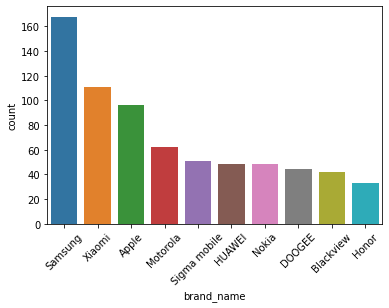

In [56]:
plt.xticks(rotation=45)
sns.countplot(data=df, x='brand_name',
              order=df['brand_name'].value_counts().iloc[:10].index)

Are these brands really that popular among consumers and sellers? We'll take a look at the top 10 in average popularity rank and the average number of sellers on the market. The greater the rank is, the more popular the brand is.

brand_name
BlackBerry    916.000000
OnePlus       871.888889
Apple         865.791667
Google        852.333333
OPPO          829.809524
CAT           818.142857
Xiaomi        805.918919
vivo          743.529412
ASUS          705.818182
ZTE           699.708333
Name: popularity, dtype: float64


<AxesSubplot:ylabel='brand_name'>

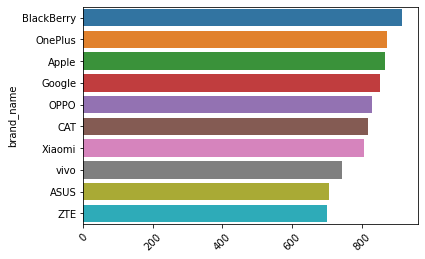

In [72]:
top_10_popular_brand = df.groupby(by=['brand_name']).mean().sort_values('popularity', ascending=False)['popularity'].head(10)

print(top_10_popular_brand)

sns.barplot(top_10_popular_brand.values, top_10_popular_brand.index)

We can see that Samsung, which has the greatest number of phone models sold, is not even in the top 10 when it comes to popularity. At the same time, Blackberry and OnePlus are the most popular brands even if there aren't a variety of phone models available (neither of them are in the top 10 for the number of models).

brand_name
Apple           42.666667
Fly             31.800000
CAT             31.428571
ZTE             30.750000
Sigma mobile    29.294118
ALCATEL         28.000000
Tecno           22.909091
OPPO            21.857143
Ulefone         20.800000
Nokia           20.208333
Name: sellers_amount, dtype: float64


<AxesSubplot:ylabel='brand_name'>

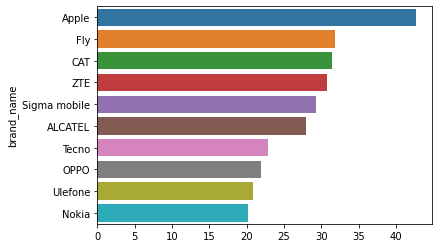

In [73]:
# which brand are sold by the most sellers
top_10_seller = df.groupby(by=['brand_name']).mean().sort_values('sellers_amount', ascending=False)['sellers_amount'].head(10)

print(top_10_seller)

sns.barplot(top_10_seller.values, top_10_seller.index)

Apple seems like a dominant player in Ukraine as it is in the top 3 of all 3 rankings.

Now we'll find out whether screen sizes make the phone more expensive by looking at the correlation between screen sizes and best prices.

<AxesSubplot:xlabel='screen_size', ylabel='best_price'>

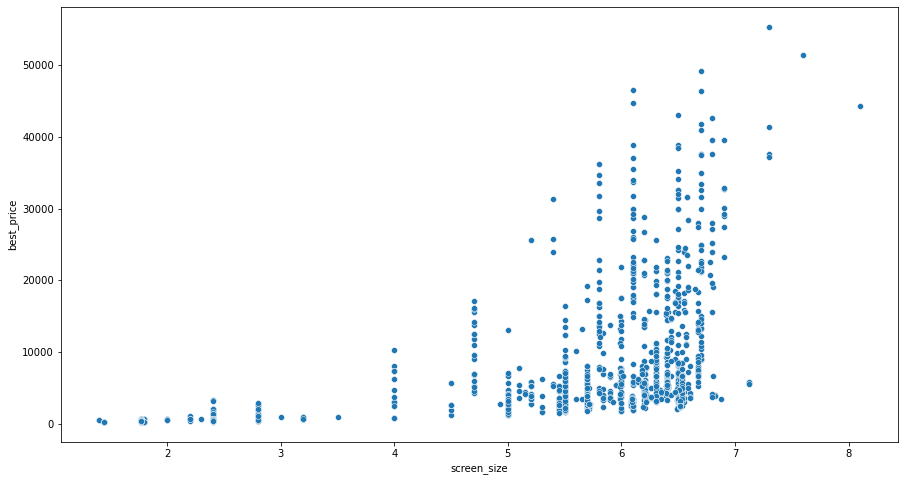

In [86]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='screen_size', y='best_price')

Seems like there are no strong correlations between screen size and price. Phones with screens smaller than 4 inches are indeed cheaper, but when it comes to larger screens, a lot of phones are still priced relatively low. A possible reason for this is that they might be older models, so we will add release year into the mix.

In [82]:
df['release_year'] = pd. DatetimeIndex(pd.to_datetime(df['release_date'], format='%m-%Y')).year

df.head()

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,release_year
1,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020,2020
2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,2020
3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,2020
4,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020,2020
5,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,1999.0,1999.0,10,5.71,16.0,3000.0,4-2020,2020


<AxesSubplot:xlabel='screen_size', ylabel='best_price'>

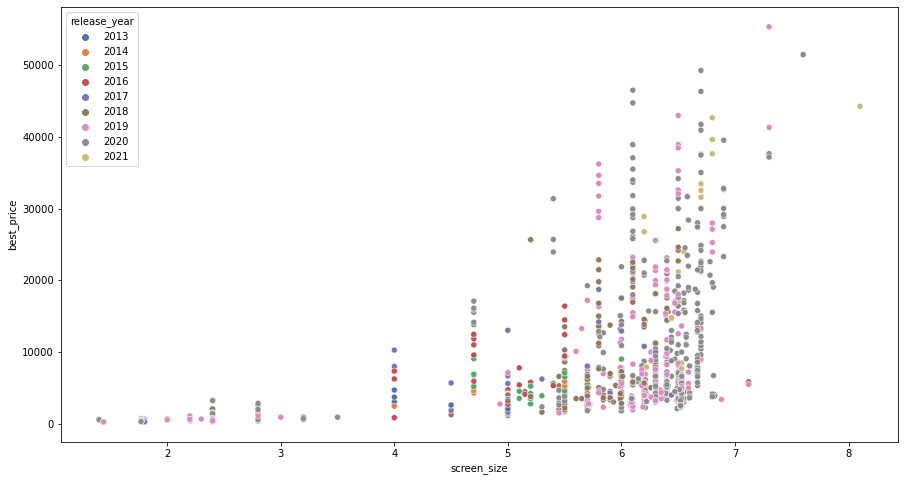

In [85]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='screen_size', y='best_price', hue='release_year',  palette="deep")

Still we cannot see any clear distinction between the price of newer and older phones with larger screens. We may only conclude that phones manufactured in 2017 or before will most likely cost less than 20,000 hrivnyas.

We now look at other possible correlations between the features of each the phone models.

,popularity,best_price,sellers_amount,screen_size,memory_size,battery_size,release_year
popularity,1.000000,0.345958,0.492303,0.331287,0.224087,0.217726,0.297478
best_price,0.345958,1.000000,0.302721,0.460602,0.725014,0.175830,0.206046
sellers_amount,0.492303,0.302721,1.000000,-0.024764,0.115458,-0.031637,0.273639
screen_size,0.331287,0.460602,-0.024764,1.000000,0.450315,0.615753,0.228574
memory_size,0.224087,0.725014,0.115458,0.450315,1.000000,0.225315,0.182391
battery_size,0.217726,0.175830,-0.031637,0.615753,0.225315,1.000000,0.290730
release_year,0.297478,0.206046,0.273639,0.228574,0.182391,0.290730,1.000000


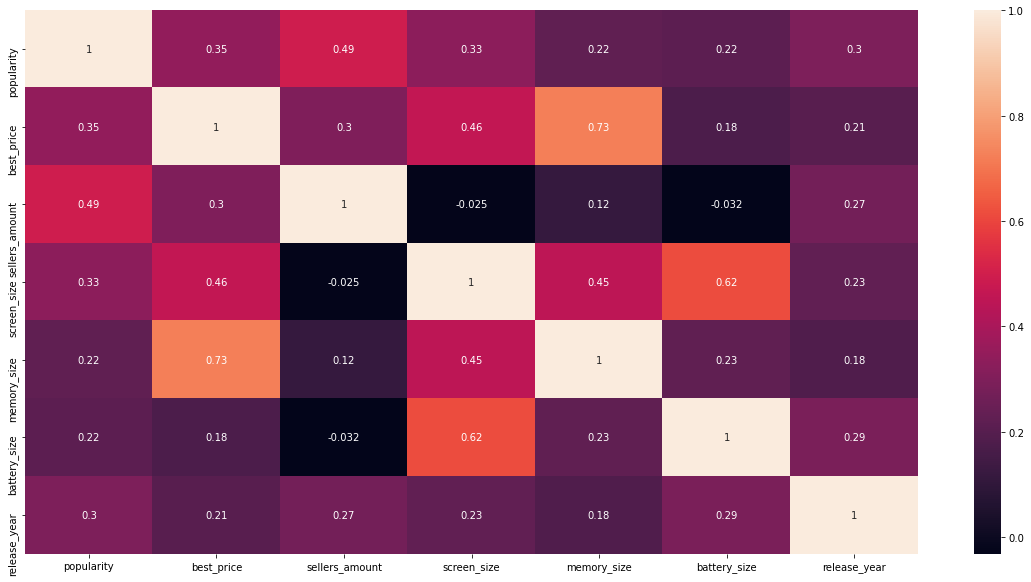

In [92]:
plt.figure(figsize=(20,10))
c= df.drop(columns=['lowest_price', 'highest_price']).corr()
sns.heatmap(c, annot=True)
c

- We can see a fairly high correlation between the price and the memory size of the phone.
- Screen size and price also scores higher in correlations when compared to other features.
- The number of sellers and popularity of the phone are somewhat correlated though it's not a strong correlation.

Now we analyze the price and features of the top 100 most popular phone models.

In [101]:
df_top_100_most_popular = df.sort_values(by='popularity', ascending=False).head(100)

df_top_100_most_popular

,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,release_year
1148,Apple,iPhone 12 Pro 128GB Pacific Blue (MGMN3/MGLR3),iOS,1224,33992.0,31849.0,42999.0,101,6.10,128.0,2815.0,10-2020,2020
735,Google,Pixel 4a 6/128GB Just Black,Android,1223,12106.0,11740.0,12999.0,37,5.81,128.0,3140.0,8-2020,2020
742,Xiaomi,Poco X3 NFC 6/128GB Cobalt Blue,Android,1222,7152.0,6836.0,7999.0,59,6.67,128.0,5160.0,9-2020,2020
1125,Apple,iPhone 11 64GB Black (MWLT2),iOS,1221,20889.0,18200.0,26499.0,93,6.10,64.0,3110.0,9-2019,2019
450,Samsung,Galaxy M51 6/128GB Black (SM-M515FZKD),Android,1220,9620.0,8555.0,10394.0,55,6.70,128.0,7000.0,9-2020,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Apple,iPhone XS Max 256GB Gold (MT552),iOS,1128,24184.0,18399.0,30600.0,37,6.50,256.0,3174.0,9-2018,2018
818,Xiaomi,Redmi Note 4x 4/64GB Black,Android,1127,2809.0,2730.0,2889.0,2,5.50,64.0,4100.0,5-2017,2017
1215,Apple,iPhone XS 256GB Gold (MT9K2),iOS,1126,21463.0,15281.0,25617.0,68,5.80,256.0,2568.0,9-2018,2018
833,Xiaomi,Redmi Note 8 Pro 6/128GB Green,Android,1125,6811.0,6435.0,7264.0,31,6.53,128.0,4500.0,9-2019,2019


array([[<AxesSubplot:title={'center':'best_price'}>,
        <AxesSubplot:title={'center':'sellers_amount'}>],
       [<AxesSubplot:title={'center':'screen_size'}>,
        <AxesSubplot:title={'center':'memory_size'}>],
       [<AxesSubplot:title={'center':'battery_size'}>,
        <AxesSubplot:title={'center':'release_year'}>]], dtype=object)

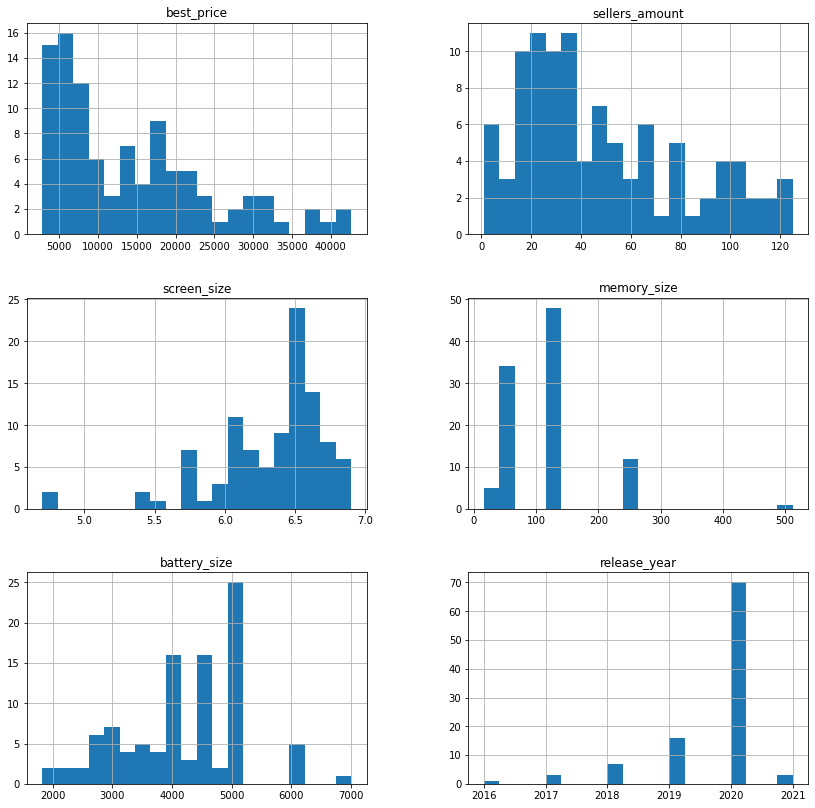

In [102]:
df_top_100_most_popular.drop(columns=['popularity', 'lowest_price', 'highest_price']).hist(bins=20,figsize =(14,14))

The majority of most popular phones cost 20,000 hrivnyas (~750 USD) or less, and unsurprisingly, consumers seems to prefer larger screen sizes, with the most popular size being 6.5 inches.

128 GB seems to be the optimal memory size, followed by 64 GB and 256 GB. 

The phone battery capacity is usually capped at 5000 mAh or less, with a few exceptions (less than 10% of top 100 phones) having 6000 or 7000 mAh battery.

People also favor newer phone models, with almost 90% of these most popular models being manufactured in 2019 or later. As the data was released in February 2021, not a lot of 2021 models had been released.